# Classification Tree in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [6]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

---

### Explore the Dataset

Exploring any dataset requires a solid understanding of the domain -- it is Pokemon, in our case.    
We understand the following basics regarding Pokemon, primarily from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon) and [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Generation).    

> **Generation** : There are seven generations of Pokemon as of 2018, with 721 till Generation VI (this dataset).   
> **Type** : Every Pokemon has a *primary* type, and some of them also have a *secondary* type -- dual-type ones.    
> **Legendary** : These Pokemons are rare, powerful, and really hard to catch -- there are 38 upto Generation VI.    

Way more trivia about Pokemon is available online -- but let's come back and retrieve more information from the data.

In [7]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [8]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [9]:
# Information about the Variables
pkmndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#### Generations of Pokemon in the Dataset

In [10]:
len(pkmndata["Generation"].unique())

6

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


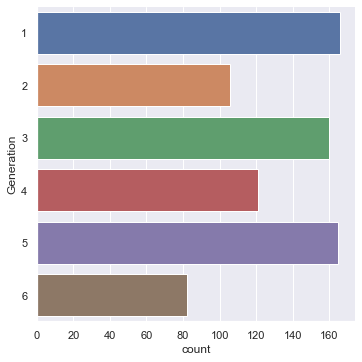

In [11]:
# Generations in the Dataset #Learn to use the .unique() function
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation #Learn to use the value_counts() functionn
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = "count")

#### Types of Pokemon in the Dataset

![Types of Pokemon](images/PokemonTypes.png)

We understand that there are 18 Sun and Moon types for Pokemons, as shown in the image above, and some have both the Sun and Moon types.   

In [12]:
pkmndata.dropna().head() 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ice         14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


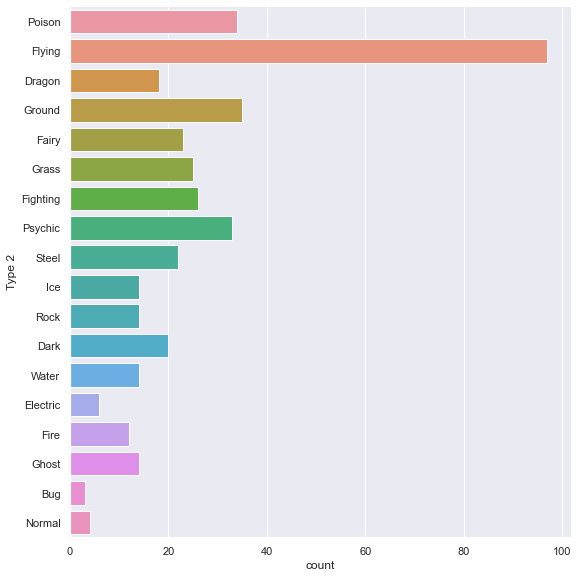

In [13]:
# Secondary Types in the Dataset: use the dropna() function to remove missing values.
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)

In [14]:
pkmndata[pkmndata["Type 2"].isnull()]
#all pokemons have a 'Type 1' category, but 386 pokemons don't have a 'Type 2' category

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [15]:
# Pokemons with a Single Type -- I #Learn to use the isnull() function
singletype_data = pkmndata[pkmndata["Type 2"].isnull()]
print("Pokemons with just Type 1 :", len(singletype_data))
singletype_data.head()

Pokemons with just Type 1 : 386


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [16]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))
dualtype_data.head()

Pokemons with Types 1 and 2 : 414


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


---

## Simple Decision Tree

We will start by setting up a simple Classification Problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total**    

Extract the variables and the associated data as a Pandas `DataFrame`.

In [17]:
legnd = pd.DataFrame(pkmndata['Legendary'])  # Response
total = pd.DataFrame(pkmndata['Total'])      # Predictor

Set up the classification problem with Train and Test datasets.   
Train Set with 600 samples and Test Set with 200 samples.

In [18]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
total_train, total_test, legnd_train, legnd_test = train_test_split(total, legnd, test_size = 0.25)

# Check the sample sizes
print("Train Set :", legnd_train.shape, total_train.shape)
print("Test Set  :", legnd_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [19]:
type(legnd_train["Legendary"])

pandas.core.series.Series

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [20]:
# Summary Statistics for Legendary Train
legnd_train["Legendary"].value_counts()

False    552
True      48
Name: Legendary, dtype: int64

In [21]:
# Summary Statistics for Total Train
total_train.describe()

,Total
count,600.000000
mean,435.953333
std,117.749846
min,194.000000
25%,330.000000
50%,450.000000
75%,515.000000
max,780.000000


<AxesSubplot:xlabel='Legendary', ylabel='count'>

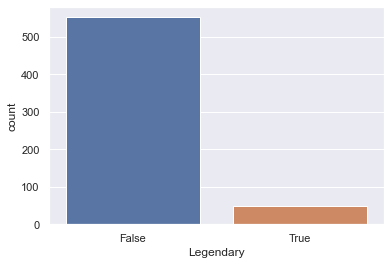

In [22]:
# Count Plot for Legendary Train
sb.countplot(x=legnd_train["Legendary"])

<AxesSubplot:xlabel='Total', ylabel='Legendary'>

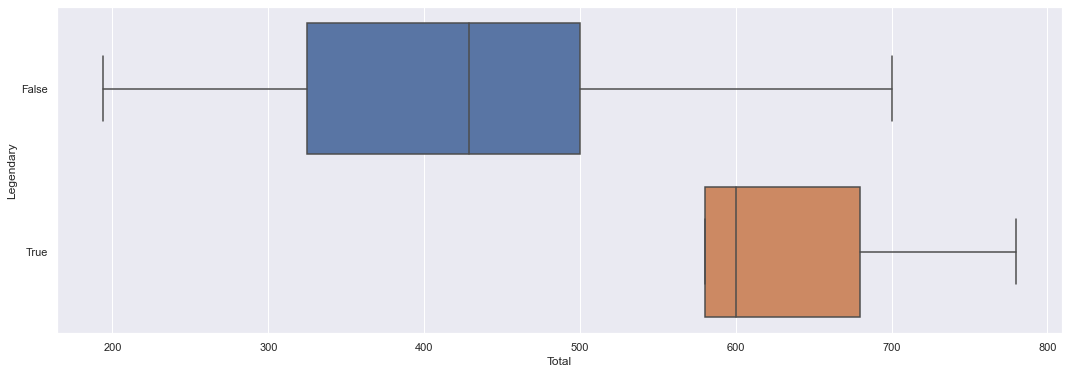

In [23]:
# Create a joint dataframe by concatenating Total and Legendary
jointDF = pd.concat([total_train, legnd_train], axis = 1)

# Joint Boxplot of Total Train against Legendary Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Total", y = "Legendary", data = jointDF, orient = "h")

<AxesSubplot:xlabel='Total', ylabel='Legendary'>

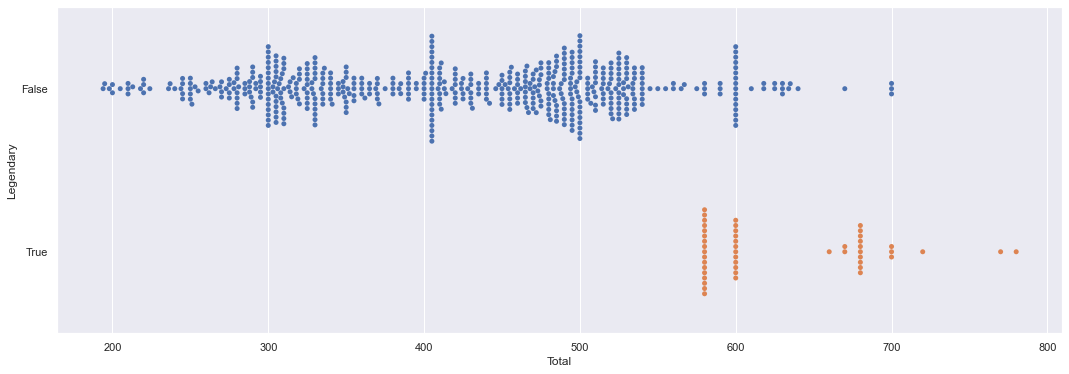

In [24]:
# Joint Swarmplot of Total Train against Legendary Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Total", y = "Legendary", data = jointDF, orient = "h")
# the x and y parameters in swarmplot automatically pick out the right columns as specified

#### Decision Tree in Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [28]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `total_train` as *Predictor* and `legnd_train` as *Response*.

In [29]:
# Train the Decision Tree Classifier model
dectree.fit(total_train, legnd_train)

DecisionTreeClassifier(max_depth=2)

[Text(267.84000000000003, 543.6, 'Total <= 577.5\ngini = 0.147\nsamples = 600\nvalue = [552, 48]\nclass = Ordinary'),
 Text(133.92000000000002, 326.16, 'gini = 0.0\nsamples = 515\nvalue = [515, 0]\nclass = Ordinary'),
 Text(401.76000000000005, 326.16, 'Total <= 650.0\ngini = 0.492\nsamples = 85\nvalue = [37, 48]\nclass = Legendary'),
 Text(267.84000000000003, 108.72000000000003, 'gini = 0.498\nsamples = 62\nvalue = [33, 29]\nclass = Ordinary'),
 Text(535.6800000000001, 108.72000000000003, 'gini = 0.287\nsamples = 23\nvalue = [4, 19]\nclass = Legendary')]

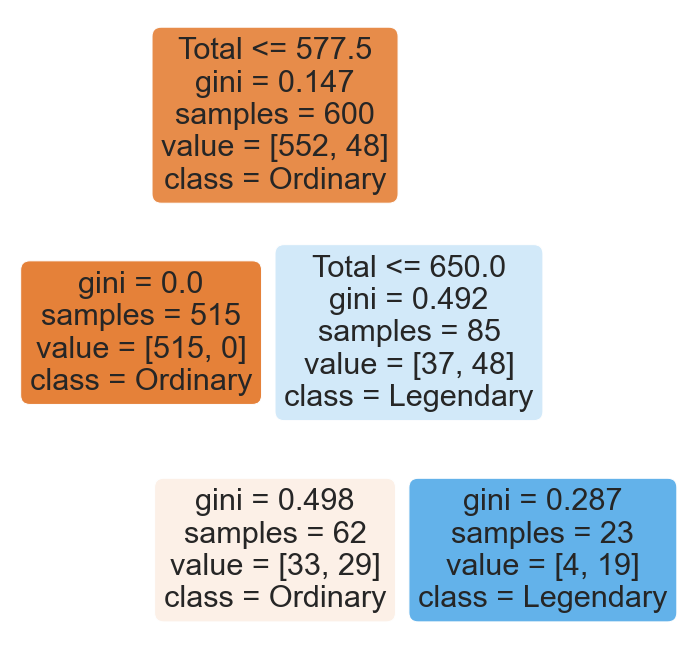

In [30]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["Ordinary","Legendary"])

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.945


<AxesSubplot:>

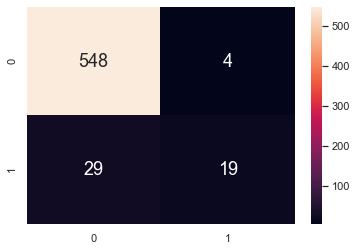

In [31]:
# Predict Legendary corresponding to Total Train
legnd_train_pred = dectree.predict(total_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

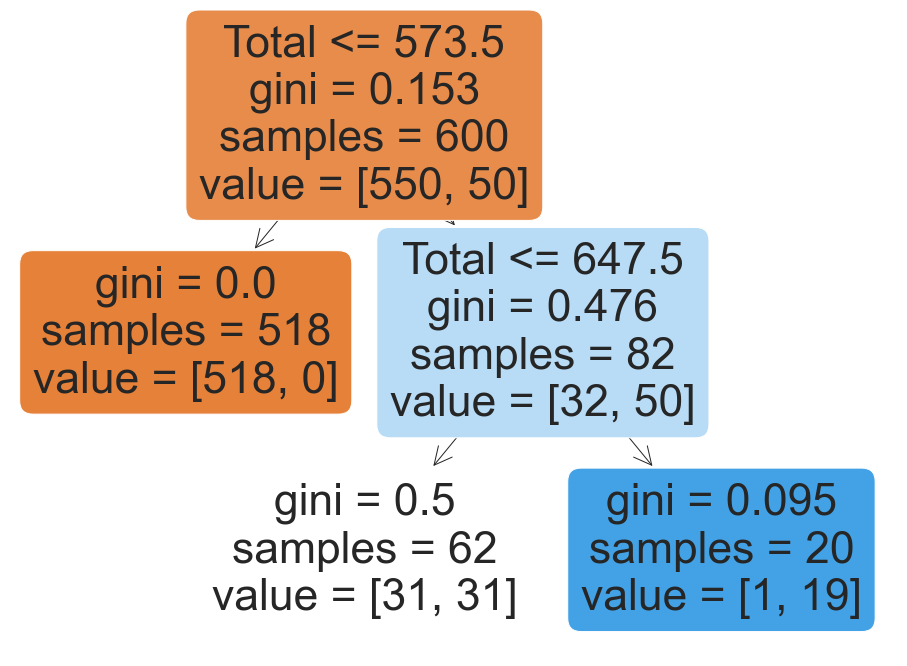

In [26]:
# Import the function plot_tree
from sklearn.tree import plot_tree

# Plot the Decision Tree model 
f, axes = plt.subplots(1, 1, figsize=(16, 12))  
plot_tree(dectree, filled=True, rounded = True, feature_names=total_train.columns)
plt.show()

Classification Accuracy 	: 0.9466666666666667


<AxesSubplot:>

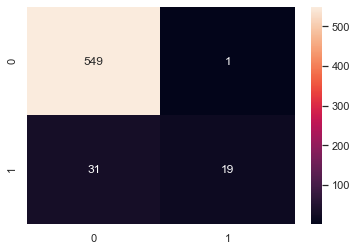

In [27]:
# Predict Legendary corresponding to Total Train
# Remember: training set is to be used as the input argument to the decision tree classifier.
legnd_train_pred = dectree.predict(total_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 12})

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.95


<AxesSubplot:>

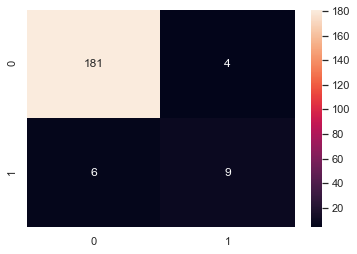

In [28]:
# Predict Legendary corresponding to Total Test
legnd_test_pred = dectree.predict(total_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_test, legnd_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_test, legnd_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 12})

---

## Multi-Variate Classification Tree

Let us set up another Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.975

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.975



<AxesSubplot:>

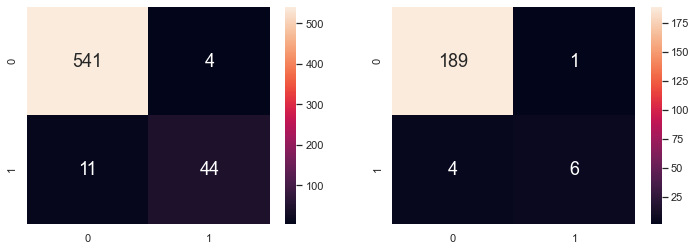

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(pkmndata['Legendary'])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 587.0880000000001, 'Total <= 573.5\ngini = 0.167\nsamples = 600\nvalue = [545, 55]\nclass = Ordinary'),
 Text(283.2923076923077, 456.624, 'gini = 0.0\nsamples = 512\nvalue = [512, 0]\nclass = Ordinary'),
 Text(386.3076923076923, 456.624, 'Total <= 647.5\ngini = 0.469\nsamples = 88\nvalue = [33, 55]\nclass = Legendary'),
 Text(206.03076923076924, 326.1600000000001, 'Total <= 585.0\ngini = 0.499\nsamples = 59\nvalue = [28, 31]\nclass = Legendary'),
 Text(103.01538461538462, 195.69600000000003, 'Sp. Atk <= 127.0\ngini = 0.255\nsamples = 20\nvalue = [3, 17]\nclass = Legendary'),
 Text(51.50769230769231, 65.23200000000008, 'gini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = Legendary'),
 Text(154.52307692307693, 65.23200000000008, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Ordinary'),
 Text(309.04615384615386, 195.69600000000003, 'HP <= 52.5\ngini = 0.46\nsamples = 39\nvalue = [25, 14]\nclass = Ordinary'),
 Text(257.53846153846155, 65.23200000000008, 'gini = 0.0\nsam

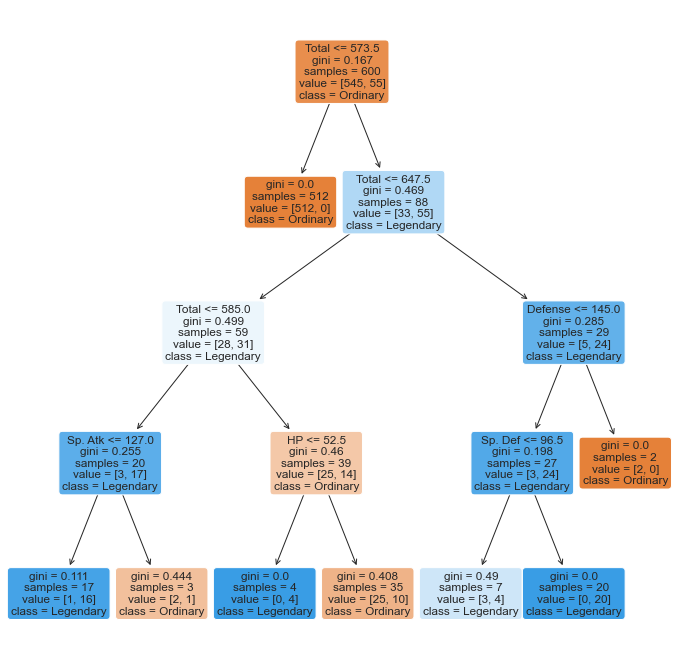

In [42]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

---

## Prediction using a Classification Tree

Once we have trained a Multi-Variate Classification Tree, we may use it to predict **Legendary** for any particular Pokemon.   

#### Prediction of Legendary

Let's predict the value of **Legendary** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [43]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [46]:
# Extract Predictors for Prediction
# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array([False,  True,  True])

In [47]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredLegend"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Legendary"]], y_pred], axis = 1)

pkmndata_acc

,Name,Legendary,PredLegend
15,Butterfree,False,False
162,Mewtwo,True,True
545,GiratinaOrigin Forme,True,True


---

## Multi-Class Classification Tree

Let us set up a Multi-Class Classification problem.   

Response Variable : **Type 1**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

In [62]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Type 1'].astype('category'))
X = pd.DataFrame(pkmndata[predictors]) 

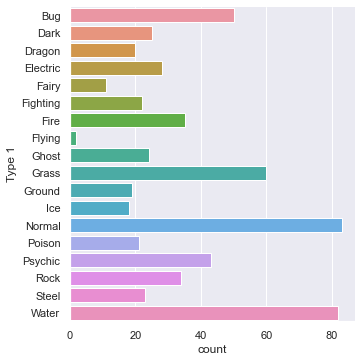

In [63]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Type 1", data = y_train, kind = "count")

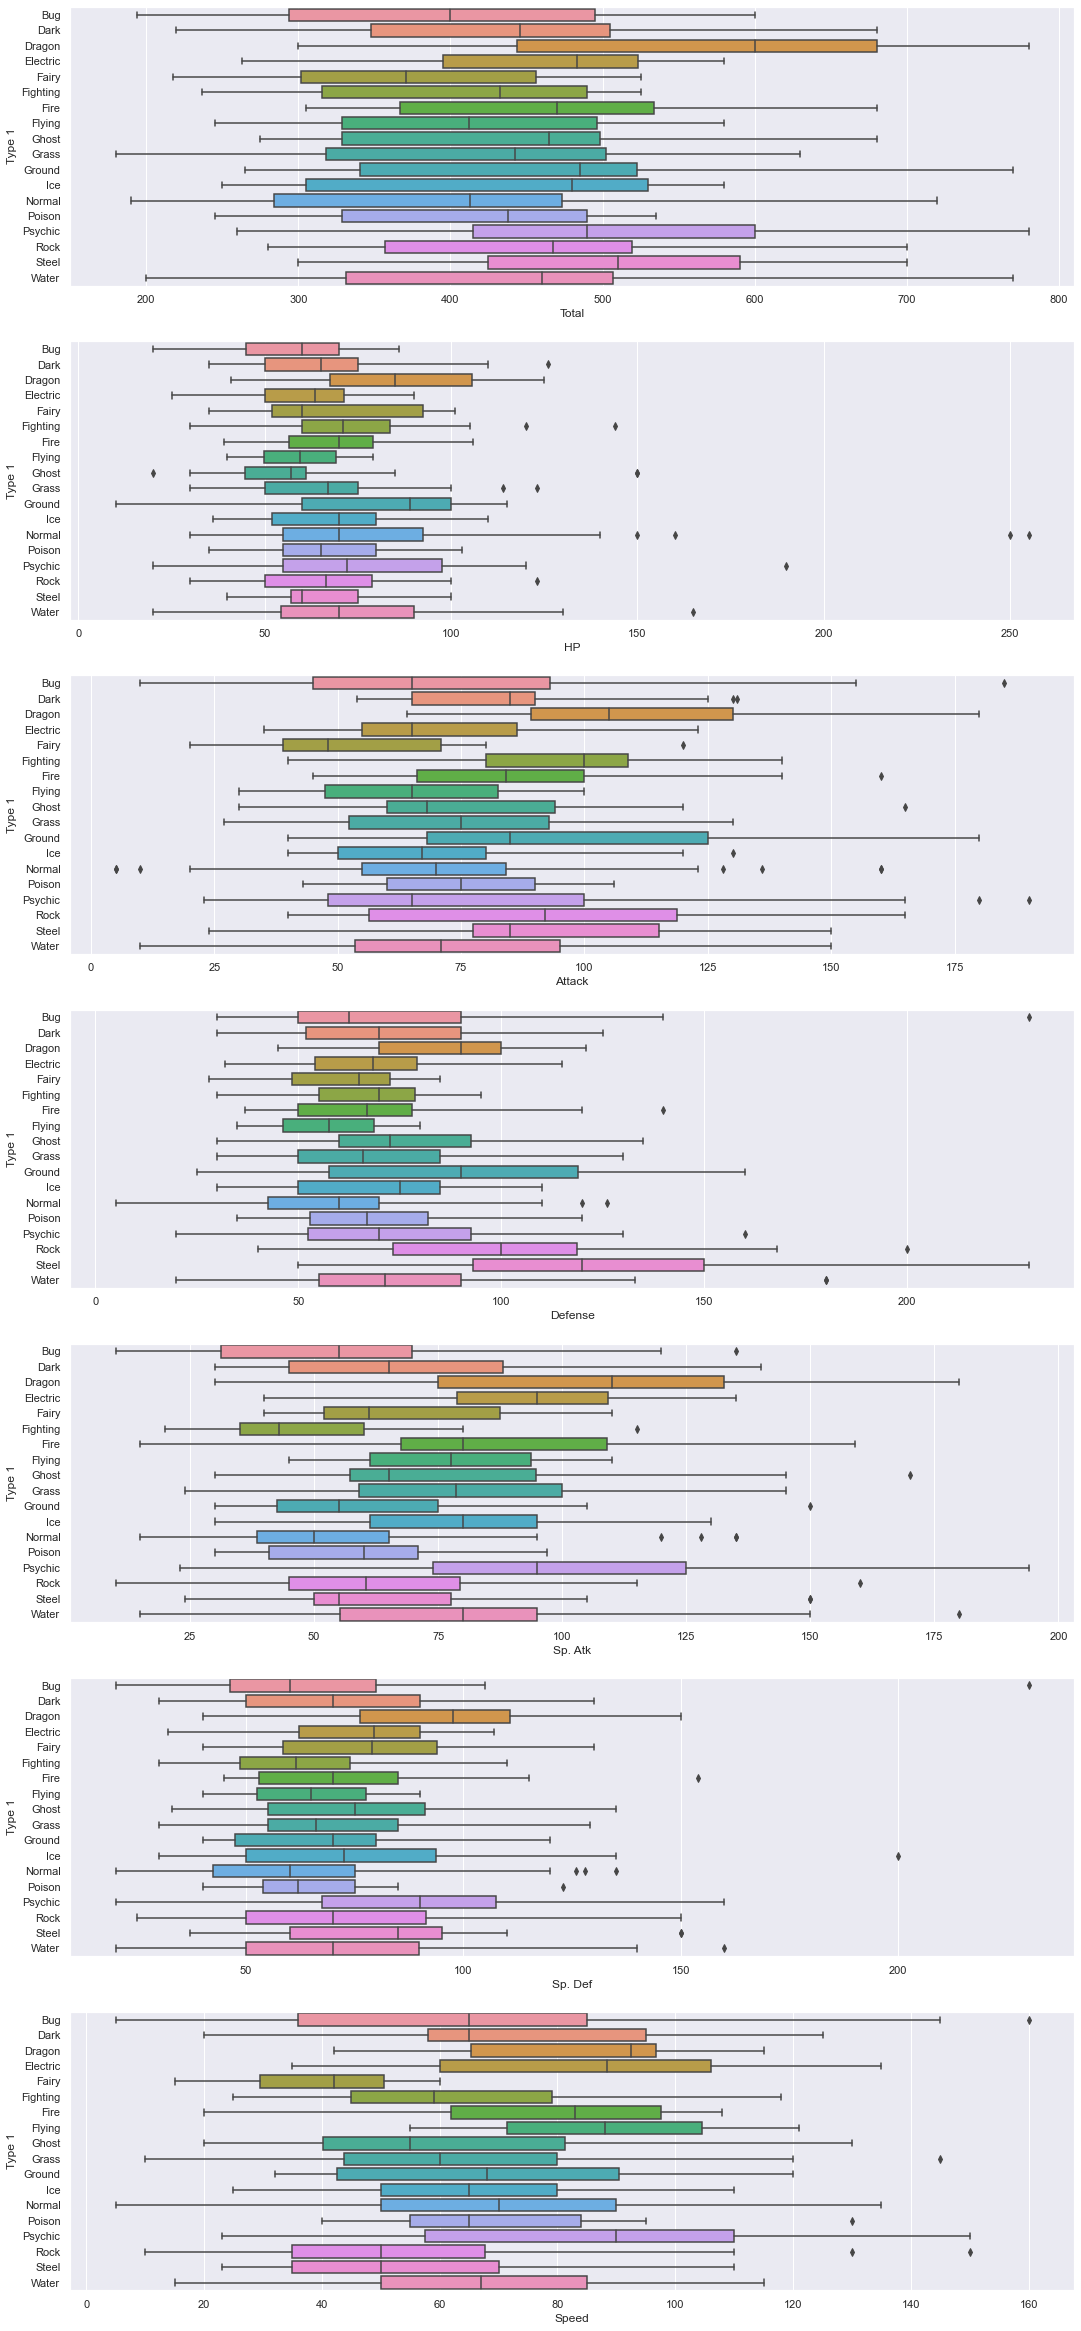

In [64]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Type 1", data = trainDF, orient = "h", ax = axes[count])
    count += 1

#### Training the Decision Tree

In [65]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.29333333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.16



<AxesSubplot:>

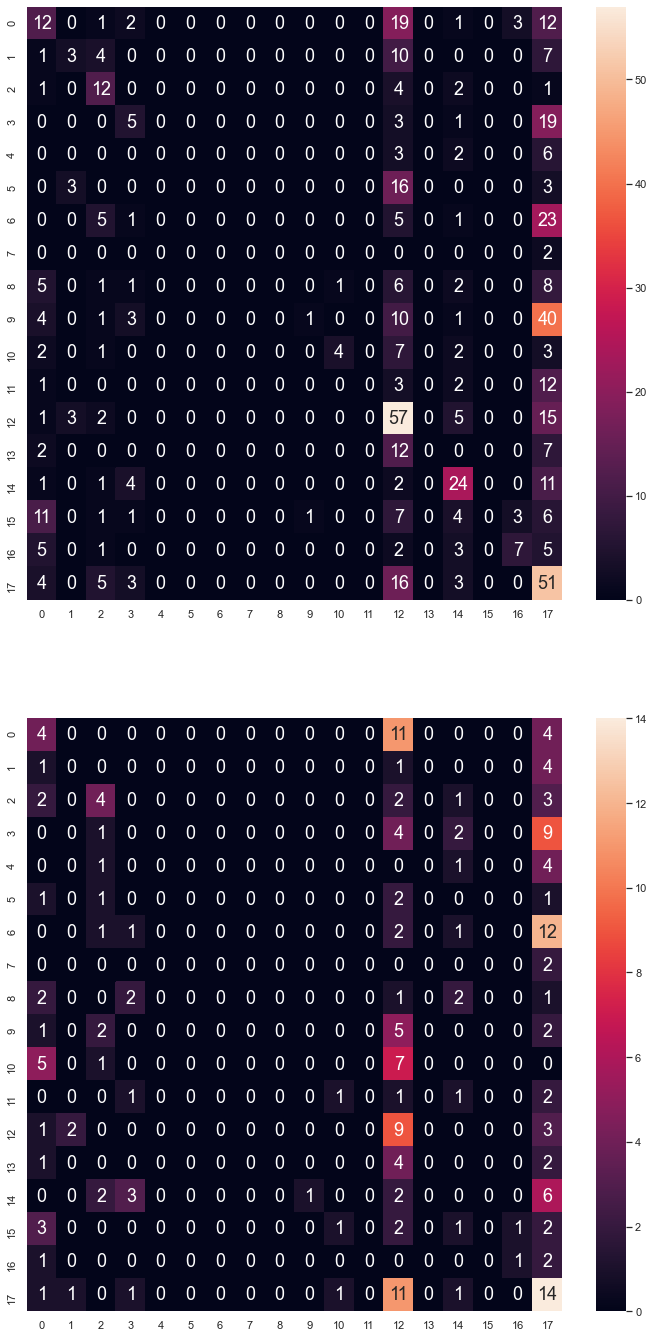

In [66]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Prediction of Type 1

Let's predict the value of **Type 1** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [67]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [68]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Psychic', 'Psychic', 'Dragon'], dtype=object)

In [69]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Type 1"]], y_pred], axis = 1)

pkmndata_acc

,Name,Type 1,PredType
15,Butterfree,Bug,Psychic
162,Mewtwo,Psychic,Psychic
545,GiratinaOrigin Forme,Ghost,Dragon
